<a href="https://colab.research.google.com/github/RerarooM/LGMVIP-DataScience/blob/main/LGM_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Decision Tree  Algorithm- Iris dataset** - LMG_task2

Dataset:https://bit.ly/3kXTdox

To create Decision Tree classifier and visualize it graphically. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Author: **Muskaan Raj**

**Data**

In [ ]:
#importing the required libries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [65]:
#loading and importing the data
print("Importing data...")
df = pd.read_csv("/content/drive/MyDrive/LGM/Iris.csv")


Importing data...


In [66]:
df.head() #prints 1st 5 data from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#as 1st 5 data printed sucessfully 
print("Data imported sucessfully!!")

Data imported sucessfully!!


**Data  Analysis**

In [ ]:
df.shape

(150, 6)

This means:

no. of rows = 150

no. of columns = 6

In [ ]:
df.info() #info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe() #description of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


From the above description we can conclude that:

- There are 150 count and 4 features.

- From mean we can say Length of both sepal and petal is greater than its width

In [ ]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

We can observe there are 3 classes each equally distributed.

In [ ]:
#creating 3 dataframe one of each Species
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']


In [ ]:
#describing each species
print("Setosa:\n",setosa.describe())
print("\nVersicolor:\n",versicolor.describe())
print("\nVirginica:\n",virginica.describe())

Setosa:
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Versicolor:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can conclude that none of the element is null.

In [ ]:
df.drop(columns=["Id"],axis=1, inplace=True) #id column is of no use  for further process.

**Data Visualisation:**

Scatter plot

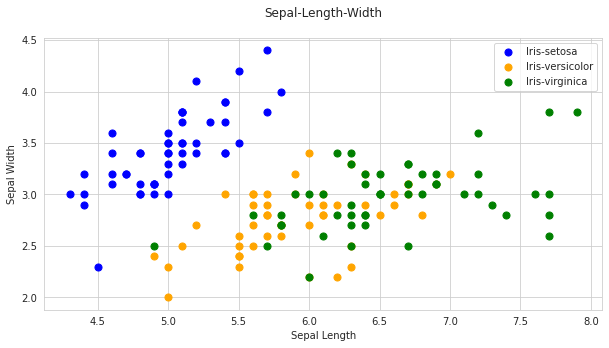

In [ ]:
sepal = setosa.plot(kind='scatter' , x = 'SepalLengthCm', y  = 'SepalWidthCm', 
                    color = 'blue', label= 'Iris-setosa', s=50)
versicolor.plot(kind='scatter' , x = 'SepalLengthCm', y  = 'SepalWidthCm', 
                    color = 'orange', label = 'Iris-versicolor', ax = sepal, s = 50)
virginica.plot(kind='scatter' , x = 'SepalLengthCm', y  = 'SepalWidthCm', 
                    color = 'green', label = 'Iris-virginica', ax = sepal, s = 50)

sepal.set_xlabel('Sepal Length')
sepal.set_ylabel('Sepal Width')
sepal.set_title('Sepal-Length-Width\n')
sepal = plt.gcf()
sepal.set_size_inches(10, 5)
plt.show()

In the above Scatter plot all bluepoints(Iris-setosa) are separated perfectly as compare to red(versicolor) or yellow(virginica) points for features(SepalLengthCm, SepalwidthCm)

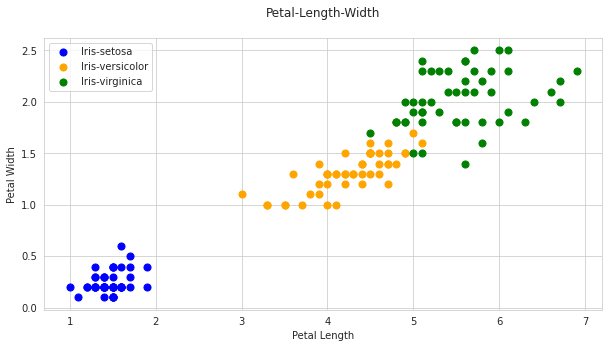

In [ ]:
petal = setosa.plot(kind='scatter' , x = 'PetalLengthCm', y  = 'PetalWidthCm', 
                    color = 'blue', label= 'Iris-setosa', s=50)
versicolor.plot(kind='scatter' , x = 'PetalLengthCm', y  = 'PetalWidthCm', 
                    color = 'orange', label = 'Iris-versicolor', ax = petal, s = 50)
virginica.plot(kind='scatter' , x = 'PetalLengthCm', y  = 'PetalWidthCm', 
                    color = 'green', label = 'Iris-virginica', ax = petal, s = 50)

petal.set_xlabel('Petal Length')
petal.set_ylabel('Petal Width')
petal.set_title('Petal-Length-Width\n')
petal = plt.gcf()
petal.set_size_inches(10, 5)
plt.show()

In the above Scatter plot all bluepoints(Iris-setosa) are separated perfectly as compare to orange(versicolor) or green(virginica) points for features(PetalLengthCm, PetalwidthCm)

Pair plot

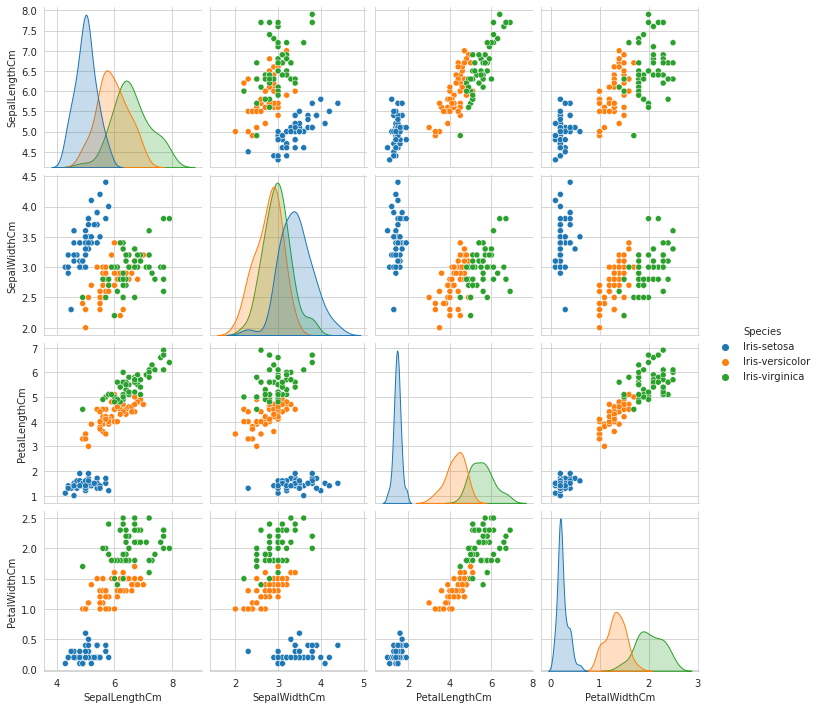

In [ ]:
#ploting graph usning seaborn
sns.set_style('whitegrid')
sns.pairplot(data = df, hue='Species')

We can observe from the pair plot that:
- Petal length and petal width are the most useful features to classify iris flower to there respective class.
- Verginica and Versicolor are a little bit overlapped but they are almost linearly separable.

Box Plot

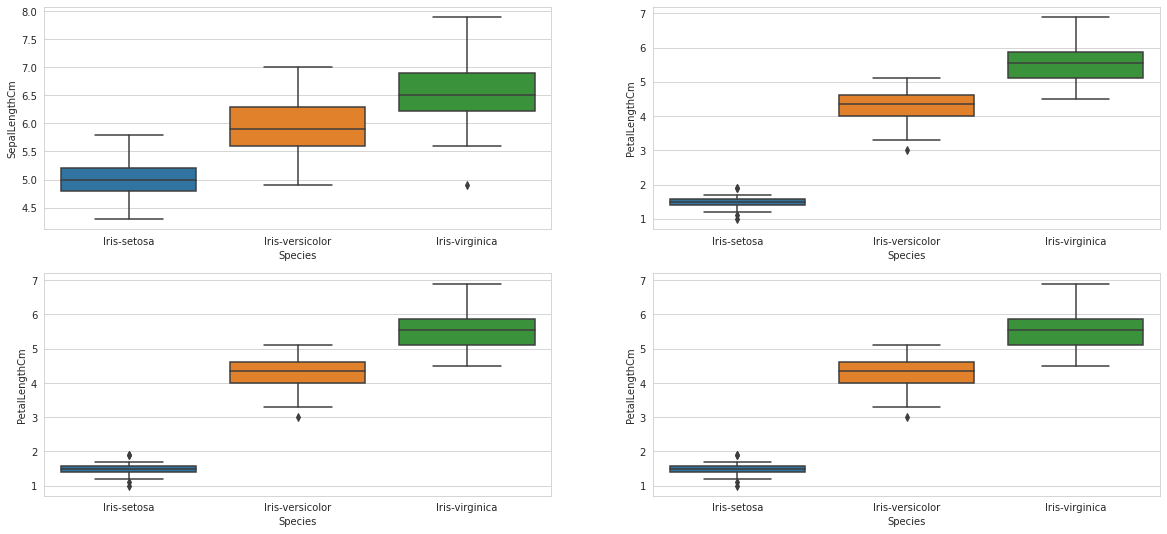

In [ ]:
fig,axes= plt.subplots(2,2,figsize=(20,9))
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df,ax= axes[0,0])
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df,ax= axes[0,1])
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df,ax= axes[1,0])
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df,ax= axes[1,1])

Violin Plot

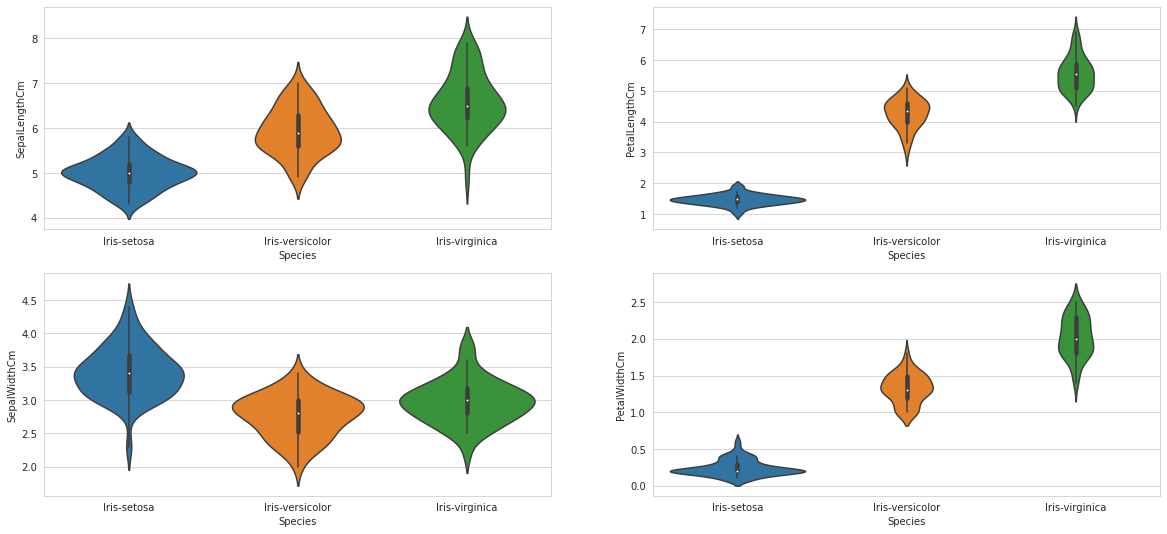

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,9))
sns.violinplot(x= 'Species', y = 'SepalLengthCm', data = df, ax= axes[0,0])
sns.violinplot(x= 'Species', y = 'PetalLengthCm', data = df, ax= axes[0,1])
sns.violinplot(x= 'Species', y = 'SepalWidthCm', data = df, ax= axes[1,0])
sns.violinplot(x= 'Species', y = 'PetalWidthCm', data = df, ax= axes[1,1])
plt.show()

We can observe:
- **We have a higher density between 5 and 6 in SepalLengthCm plot**. That is very significant because as in the SepalLengthCm description, mean value is at 5.84.
- **We have a higher density between 3 and 4 in PetalLengthCm plot**. That is very significant because as in the PetalLengthCm description, mean value is at 3.75.
- **We have a higher density between 2.5 and 3.5 in SepalWidthCm plot**. That is very significant because as in the SepalWidthCm description, mean value is at 3.05.
- **We have a higher density between 0.5 and 1.5 in PetaLWidthCm plot**. That is very significant because as in the PetalWidthCm description, mean value is at 1.19.

Correlation Matrix

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


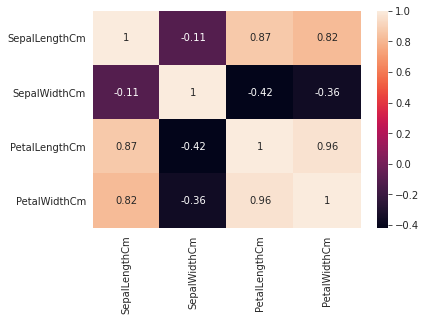

In [ ]:

sns.heatmap(df.corr(),annot= True)

**Training the model**

In [ ]:

X_all = df.iloc[:,:4]
Y_all = df.iloc[:,4] 
print(X_all)
print("\n\n",Y_all)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Ir

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3,random_state=0)
#data is split into train and test
#test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(X_train.shape)
print(X_test.shape)


(105, 4)
(45, 4)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Testing Model

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [ ]:
#testing the random value
X = [[6.7, 3.0, 5.2, 2.3]]
y_pred = model.predict(X)
print(y_pred)

['Iris-virginica']


The ans is true as the given input is SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm of 145th row i.e. of Iris-virginica

In [ ]:
# Accuracy of the model
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred))
metrics.confusion_matrix(Y_test,Y_pred)

Accuracy:  0.9777777777777777


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

So, here we can see that we get accuracy 97% which is good. Means our model predict 3% wrong prediction about a category of flower.

Confusion matrix is also a good way to see model's performance. Here out of 150 samples 30% =45 samples we used for testing purpose.

In confusion matrix the positions: 

- (0,0) i.e. 16- means 16 flowers of category 0(Setosa) predicted right.

- (1,1) i.e. 17 - flowers of category 1(Virsicolor) predicted right.

- (2,2)i.e. 11- flowers of category 2(Virginica) predicted right. 

(0,0), (1,1) and (2,2) - correct prediction rest wrong prediction. 

*Conclusion*: **Diagonal positions of matrix -right prediction , rest-wrong**

**So basically according confusion matrix out of 45 sample 1 samples predicted wrong rest are correct.**



---



---



**Tree Plotting or Decision Making in Decision Tree**




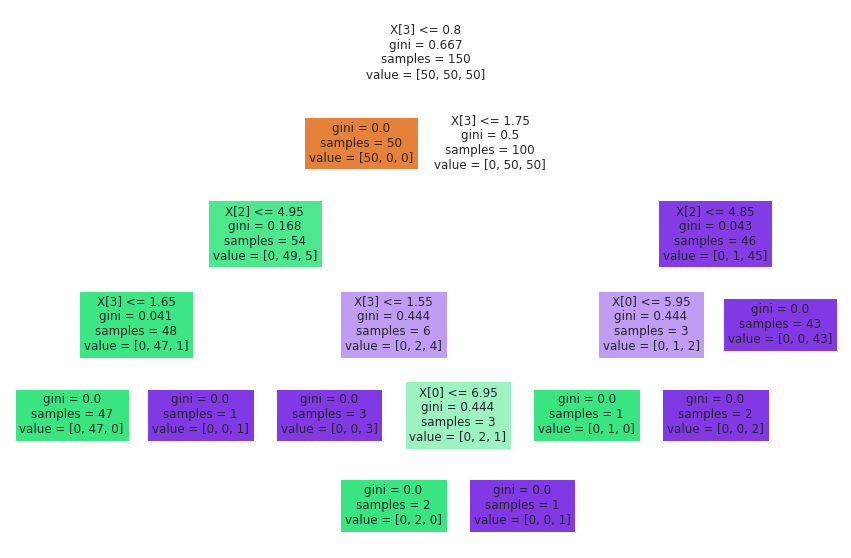

In [64]:
from sklearn import tree
# Applying the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(X_all,Y_all)
# Prepare a plot figure with set size.
plt.figure(figsize = (15,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
tree.plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()